# Data Preprocessing of Presidential Debate 2024 (Trump vs Biden)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# load the abcnews_transcript file from the data folder
with open('../data/cnnnews_biden_trump.txt', 'r') as file:
    data = file.read()


In [3]:
trumps_responses = []
bidens_responses = []

trump_identifier = "TRUMP:  "
trump_2_identifier = "DONALD TRUMP, FORMER PRESIDENT OF THE UNITED STATES AND CURRENT U.S. PRESIDENTIAL CANDIDATE: "
biden_identifier = "BIDEN: "
biden_2_identifier = "JOE BIDEN, PRESIDENT OF THE UNITED STATES: "
dana_identifier = "DANA BASH, CNN MODERATOR: "
dana_identifier2 = "BASH: "
tapper_identifier = "JAKE TAPPER, CNN MODERATOR: "
tapper_identifier2 = "TAPPER: "

current_speaker = None
idenifiers = [trump_identifier, trump_2_identifier, biden_identifier, biden_2_identifier, dana_identifier, dana_identifier2, tapper_identifier, tapper_identifier2]

for line in data.split('\n'):
    if line:
        for identifier in idenifiers:
            if line.startswith(identifier):
                current_speaker = identifier
        if current_speaker == trump_identifier or current_speaker == trump_2_identifier:
            trumps_responses.append(line)
        elif current_speaker == biden_identifier or current_speaker == biden_2_identifier:
            bidens_responses.append(line)

trump_responses = []
bucket = ""
for response in trumps_responses:
    if response.startswith(trump_identifier) or response.startswith(trump_2_identifier):
        trump_responses.append(bucket)
        bucket = ""
    bucket += response
trump_responses = trump_responses[1:]
# remove the identifiers from the responses
trump_responses = [response.replace(trump_identifier, '').replace(trump_2_identifier, '') for response in trump_responses]

biden_responses = []
bucket = ""
for response in bidens_responses:
    if response.startswith(biden_identifier) or response.startswith(biden_2_identifier):
        biden_responses.append(bucket)
        bucket = ""
    bucket += response
biden_responses = biden_responses[1:]
# remove the identifiers from the responses
biden_responses = [response.replace(biden_identifier, '').replace(biden_2_identifier, '') for response in biden_responses]

print('Number of Trump responses:', len(trump_responses))
print('Number of Biden responses:', len(biden_responses))

#for response in trump_responses[:5]:
#    print(response)

#for response in biden_responses[:5]:
#    print(response)

Number of Trump responses: 48
Number of Biden responses: 44


In [4]:
# Now we want to do some basic NLP analysis on the responses of Trump and Kamala
# First, we derive some basic descriptive statistics

# Average number of words per response
trump_avg_words = sum([len(response.split()) for response in trump_responses]) / len(trump_responses)
biden_avg_words = sum([len(response.split()) for response in biden_responses]) / len(biden_responses)

# Average length of words in responses
trump_avg_word_length = sum([len(word) for response in trump_responses for word in response.split()]) / sum([len(response.split()) for response in trump_responses])
biden_avg_word_length = sum([len(word) for response in biden_responses for word in response.split()]) / sum([len(response.split()) for response in biden_responses])

# Total number of words in all responses
trump_total_words = sum([len(response.split()) for response in trump_responses])
biden_total_words = sum([len(response.split()) for response in biden_responses])

# Total number of unique words in all responses
trump_unique_words = len(set([word for response in trump_responses for word in response.split()]))
biden_unique_words = len(set([word for response in biden_responses for word in response.split()]))

# Average number of unique words per response
trump_avg_unique_words = trump_unique_words / len(trump_responses)
biden_avg_unique_words = biden_unique_words / len(biden_responses)

# Average number of sentences per response
trump_avg_sentences = sum([response.count('.') for response in trump_responses]) / len(trump_responses)
biden_avg_sentences = sum([response.count('.') for response in biden_responses]) / len(biden_responses)

# Now we provide an overview of the results with side by side comparison (T | K) rounded to 2 decimal places
print('Descriptive statistics of Trump and Biden responses: T | B')
print('Number of responses:', len(trump_responses), '|', len(biden_responses))
print('Average number of words per response:', round(trump_avg_words, 2), '|', round(biden_avg_words, 2))
print('Average length of words in responses:', round(trump_avg_word_length, 2), '|', round(biden_avg_word_length, 2))
print('Total number of words in all responses:', trump_total_words, '|', biden_total_words)
print('Total number of unique words in all responses:', trump_unique_words, '|', biden_unique_words)
print('Average number of unique words per response:', round(trump_avg_unique_words, 2), '|', round(biden_avg_unique_words, 2))
print('Average number of sentences per response:', round(trump_avg_sentences, 2), '|', round(biden_avg_sentences, 2))


Descriptive statistics of Trump and Biden responses: T | B
Number of responses: 48 | 44
Average number of words per response: 158.06 | 145.23
Average length of words in responses: 4.42 | 4.41
Total number of words in all responses: 7587 | 6390
Total number of unique words in all responses: 1767 | 1676
Average number of unique words per response: 36.81 | 38.09
Average number of sentences per response: 13.85 | 9.82


[nltk_data] Downloading package stopwords to
[nltk_data]     /mounts/Users/cisintern/pwicke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


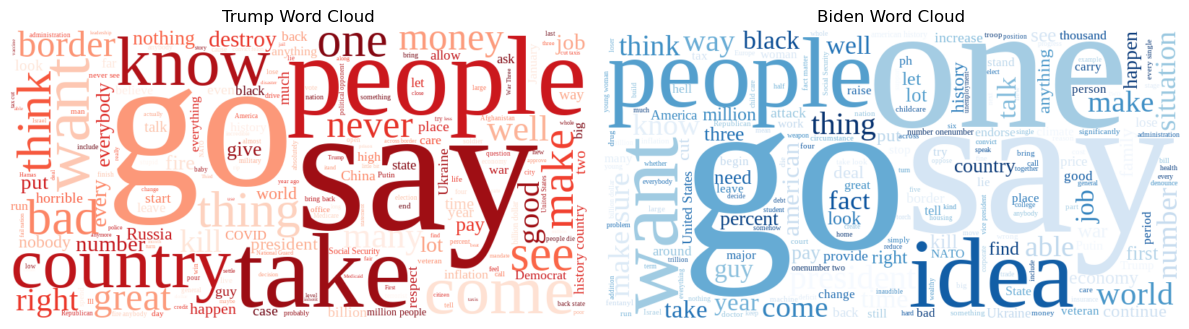

First 5 Trump words: ['great', 'economy', 'history', 'country', 'never', 'well', 'every', 'everybody', 'amazed', 'country']
First 5 Biden words: ['good', 'thank', 'take', 'look', 'leave', 'become', 'president', 'Mr', 'Trump', 'leave']


In [5]:
# Now we want to create word clouds and bar charts to visualize the most common words in the responses of Trump and Kamala
# Remove stopwords from the responses
import nltk
from nltk.corpus import stopwords
import spacy
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

font_path = fm.findfont(fm.FontProperties(family='Liberation Serif'))
stop_words = set(stopwords.words('english'))

# Remove dots and commas from the responses
trumps_responses = [response.replace('–', '').replace('?', '').replace('’', '').replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '') for response in trump_responses]
bidens_responses = [response.replace('–', '').replace('?', '').replace('’', '').replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '') for response in biden_responses]

# Lemmatize the words and remove punctuation as well as words distrupted by punctuation
doc = nlp(' '.join(trumps_responses))
trump_words = [token.lemma_ for token in doc if token.is_alpha]
doc = nlp(' '.join(bidens_responses))
biden_words = [token.lemma_ for token in doc if token.is_alpha]

# First lemmatize, then remove stopwords!
trump_words = [word for response in trump_words for word in response.split() if word.lower() not in stop_words]
biden_words = [word for response in biden_words for word in response.split() if word.lower() not in stop_words]


# Create word clouds
# Use a red color scheme for trump and a blue color scheme for kamala
trump_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(trump_words))
kamala_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='Blues').generate(' '.join(biden_words))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trump Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(kamala_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Biden Word Cloud')

plt.tight_layout()
plt.show()

# print the first 5 trump and kamala words
print('First 5 Trump words:', trump_words[:10])
print('First 5 Biden words:', biden_words[:10])


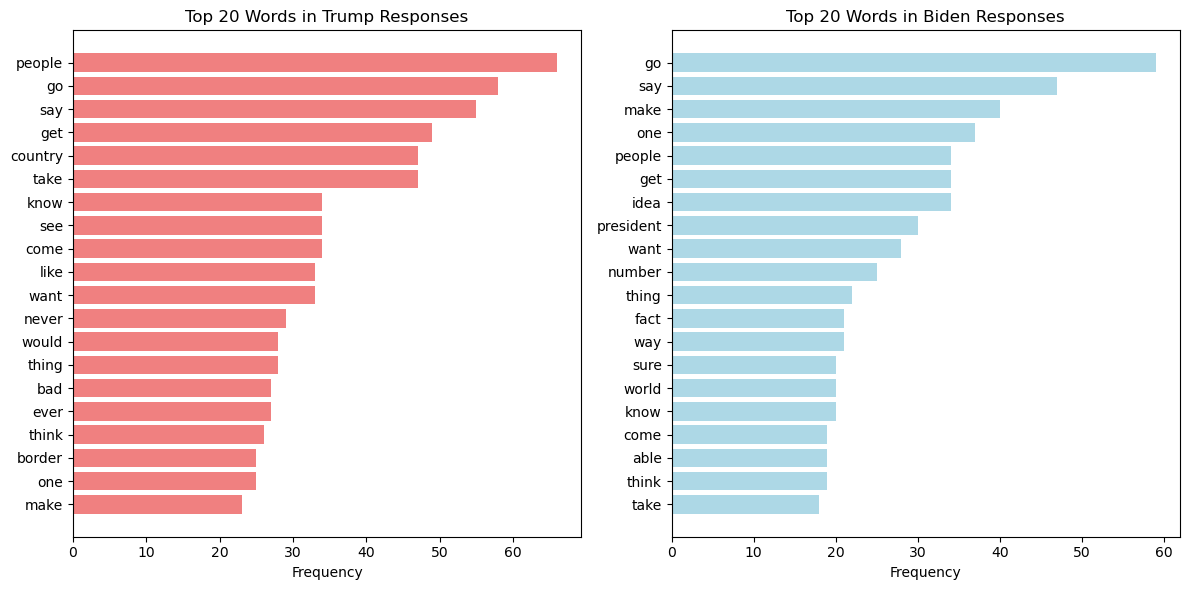

In [6]:
# Now we want to create bar charts to visualize the most common words in the responses of Trump and Kamala
# We will keep the color coding consistent with the word clouds, but in a mute color scheme
# We also want to display the top 10 most common words in each bar chart
# Most frequent words should be at the top of the bar chart

trump_word_freq = Counter(trump_words)
biden_word_freq = Counter(biden_words)

trump_top_words = [word for word, _ in trump_word_freq.most_common(20)]
trump_top_freqs = [freq for _, freq in trump_word_freq.most_common(20)]

biden_top_words = [word for word, _ in biden_word_freq.most_common(20)]
biden_top_freqs = [freq for _, freq in biden_word_freq.most_common(20)]

# Plot the bar charts with most frequent word at the top
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(trump_top_words, trump_top_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Trump Responses')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(biden_top_words, biden_top_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Biden Responses')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Putin'),
  Text(0, 1, 'Trump'),
  Text(0, 2, 'Herbert Hoover'),
  Text(0, 3, 'Hitler'),
  Text(0, 4, 'Netanyahu'),
  Text(0, 5, 'Bin Laden'),
  Text(0, 6, 'Dana'),
  Text(0, 7, 'Pell'),
  Text(0, 8, 'Fentanyl'),
  Text(0, 9, 'Kim Jong-un')])

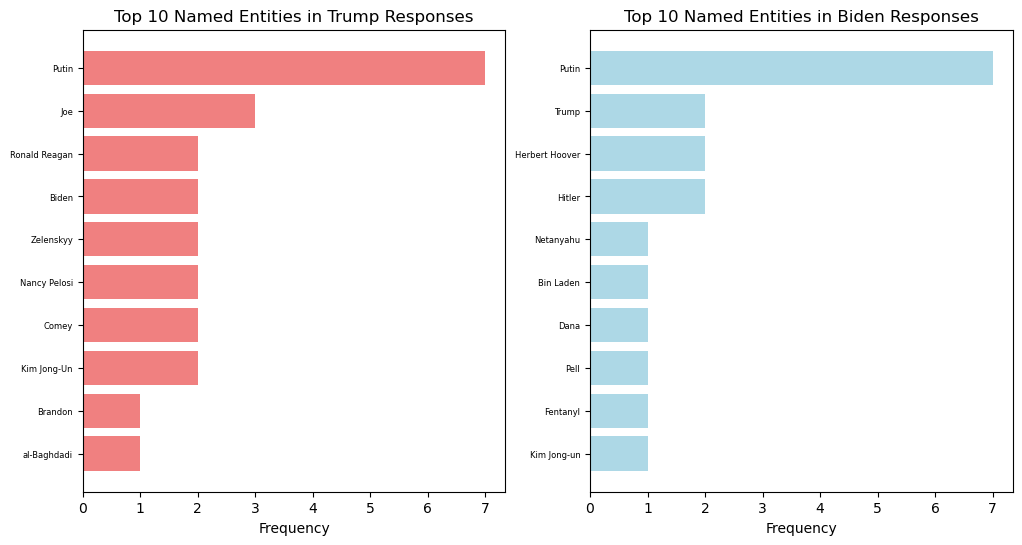

In [7]:
# We want to visualise the most common words that are not verbs or adjectives in the responses of Trump and Kamala
# but named entities

trump_named_entities = [ent.text for response in trump_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']
biden_named_entities = [ent.text for response in biden_responses for ent in nlp(response).ents if ent.label_ == 'PERSON']

# Remove stopwords from the named entities
trump_named_entities = [entity for entity in trump_named_entities if entity.lower() not in stop_words]
biden_named_entities = [entity for entity in biden_named_entities if entity.lower() not in stop_words]

# If entities are in possessive form, remove the 's
trump_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in trump_named_entities]
biden_named_entities = [entity[:-2] if entity.endswith("'s") else entity for entity in biden_named_entities]

trump_named_entity_freq = Counter(trump_named_entities)
biden_named_entity_freq = Counter(biden_named_entities)

trump_top_named_entities = [word for word, _ in trump_named_entity_freq.most_common(10)]
trump_top_named_entity_freqs = [freq for _, freq in trump_named_entity_freq.most_common(10)]

biden_top_named_entities = [word for word, _ in biden_named_entity_freq.most_common(10)]
biden_top_named_entity_freqs = [freq for _, freq in biden_named_entity_freq.most_common(10)]

# Plot the bar charts with most frequent named entity at the top
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(trump_top_named_entities, trump_top_named_entity_freqs, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 10 Named Entities in Trump Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

plt.subplot(1, 2, 2)
plt.barh(biden_top_named_entities, biden_top_named_entity_freqs, color='lightblue')
plt.xlabel('Frequency')
plt.title('Top 10 Named Entities in Biden Responses')
plt.gca().invert_yaxis()
plt.yticks(fontsize=6)

In [8]:
# How often do either of them use the word "understand" in their responses?
# And how frequently do they use the word "America" in their responses?
trump_understand_freq = trump_word_freq['understand']
biden_understand_freq = biden_word_freq['understand']

trump_america_freq = trump_word_freq['America']
biden_america_freq = biden_word_freq['America']

print('Frequency of the word "understand" in Trump responses:', trump_understand_freq)
print('Frequency of the word "understand" in Biden responses:', biden_understand_freq)
print('Frequency of the word "America" in Trump responses:', trump_america_freq)
print('Frequency of the word "America" in Biden responses:', biden_america_freq)

Frequency of the word "understand" in Trump responses: 3
Frequency of the word "understand" in Biden responses: 1
Frequency of the word "America" in Trump responses: 5
Frequency of the word "America" in Biden responses: 8


# Topic Modelling - TRUMP
### Evaluating the Cv coherence to chose the topic number

In [9]:
# Cleaning of responses before analysis

# print the first 5 trump responses before cleaning
print('First 5 Trump responses before cleaning:')
for idx, response in enumerate(trump_responses[:5]):
    print(idx, response)

print('-----------------')

# Clean the responses from stopwords
trump_responses_cleaned = []
for response in trump_responses:

    # CLEANING
    response = response.replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '')
    doc = nlp(response)
    response_cleaned = ' '.join([token.lemma_ for token in doc if token.is_alpha])
    response_cleaned = ' '.join([word for word in response_cleaned.split() if word.lower() not in stop_words])

    trump_responses_cleaned.append(response_cleaned)

# print the first 5 trump responses after cleaning
print('First 5 Trump responses after cleaning:')
for idx, response in enumerate(trump_responses_cleaned[:5]):
    print(idx, response)

# Write the cleaned responses to a new file
with open('../data/trumpBIDEN_responses_cleaned.txt', 'w') as file:
    for response in trump_responses_cleaned:
        file.write(response + '\n')
    

First 5 Trump responses before cleaning:
0 We had the greatest economy in the history of our country. We had never done so well. Every – everybody was amazed by it. Other countries were copying us.We got hit with COVID. And when we did, we spent the money necessary so we wouldn’t end up in a Great Depression the likes of which we had in 1929. By the time we finished – so we did a great job. We got a lot of credit for the economy, a lot of credit for the military, and no wars and so many other things. Everything was rocking good.But the thing we never got the credit for, and we should have, is getting us out of that COVID mess. He created mandates; that was a disaster for our country.But other than that, we had – we had given them back a – a country where the stock market actually was higher than pre-COVID, and nobody thought that was even possible. The only jobs he created are for illegal immigrants and bounceback jobs; they’re bounced back from the COVID.He has not done a good job. He

In [10]:
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Set topic numbers to be tested
min_topics = 1
max_topics = 30

# Create a dictionary from the responses
trump_responses_tokenized = [response.split() for response in trump_responses_cleaned]
trump_dictionary = Dictionary(trump_responses_tokenized)

# Create a bag of words corpus
trump_corpus = [trump_dictionary.doc2bow(response) for response in trump_responses_tokenized]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1):
    # Use Gensim's LDA model
    trump_lda_model = LdaModel(corpus=trump_corpus, id2word=trump_dictionary, num_topics=num_topics, random_state=42)
    
    # Calculate coherence using Gensim's LDA model
    coherence_model = CoherenceModel(model=trump_lda_model, texts=trump_responses_tokenized, dictionary=trump_dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)




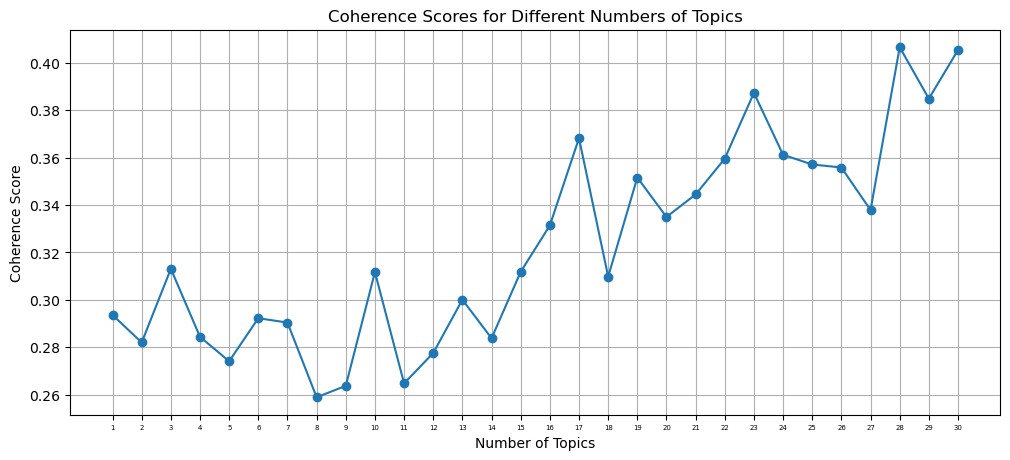

In [11]:
# Plot the coherence scores
plt.figure(figsize=(12, 5))
plt.plot(range(min_topics, max_topics + 1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
# x ticks should only be integers
plt.xticks(range(min_topics, max_topics + 1, 1))
# xticks smaller font
plt.xticks(fontsize=5)
plt.title('Coherence Scores for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model

# Create a CountVectorizer object
# Make sure that max_df corresponds to < documents than min_df
# Set stop_words to 'english' to remove common English stopwords
# Set max_df to 0.95 to remove words that appear in more than 95% of the documents
# Set min_df to 2 to remove words that appear in less than 2 documents
# Create the vectorizer and fit the responses
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
trump_vectorized = vectorizer.fit_transform(trump_responses_cleaned)

# Fit the LDA model
trump_lda = LatentDirichletAllocation(n_components=17, random_state=42)
trump_lda.fit(trump_vectorized)

# Now prepare the pyLDAvis data using the LDA model and vectorizer
pyldavis_data = pyLDAvis.lda_model.prepare(trump_lda, trump_vectorized, vectorizer)

# Store the pyLDAvis data as an HTML file
pyLDAvis.save_html(pyldavis_data, '../output/trumpBIDEN_topics.html')

/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os

# Topic Modelling - BIDEN
### Evaluating the Cv coherence to chose the topic number

In [13]:
# Cleaning of responses before analysis

# print the first 5 kamala responses before cleaning
print('First 5 Biden responses before cleaning:')
for idx, response in enumerate(biden_responses[:5]):
    print(idx, response)

print('-----------------')

# Clean the responses from stopwords
biden_responses_cleaned = []
for response in biden_responses:

    # CLEANING
    response = response.replace('.', '').replace(',', '').replace('--', '').replace('\'re', '').replace('\'m', '')
    doc = nlp(response)
    response_cleaned = ' '.join([token.lemma_ for token in doc if token.is_alpha])
    response_cleaned = ' '.join([word for word in response_cleaned.split() if word.lower() not in stop_words])
    
    biden_responses_cleaned.append(response_cleaned)


# print the first 5 kamala responses after cleaning
print('First 5 Biden responses after cleaning:')
for idx, response in enumerate(biden_responses_cleaned[:5]):
    print(idx, response)
    
# Write the cleaned responses to a new file
with open('../data/bidenBIDEN_responses_cleaned.txt', 'w') as file:
    for response in biden_responses_cleaned:
        file.write(response + '\n')

First 5 Biden responses before cleaning:
0 How are you? Good to be here. Thank you.
1  You have to take a look at what I was left when I became president, what Mr. Trump left me.We had an economy that was in freefall. The pandemic are so badly handled, many people were dying. All he said was, it’s not that serious. Just inject a little bleach in your arm. It’d be all right.The economy collapsed. There were no jobs. Unemployment rate rose to 15 percent. It was terrible.And so, what we had to do is try to put things back together again. That’s exactly what we began to do. We created 15,000 new jobs. We brought on – in a position where we have 800,000 new manufacturing jobs.But there’s more to be done. There’s more to be done. Working class people are still in trouble.I come from Scranton, Pennsylvania. I come from a household where the kitchen table – if things weren’t able to be met during the month was a problem. Price of eggs, the price of gas, the price of housing, the price of a who

In [14]:
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Set topic numbers to be tested
min_topics = 1
max_topics = 30

# Create a dictionary from the responses
biden_responses_tokenized = [response.split() for response in biden_responses_cleaned]
biden_dictionary = Dictionary(biden_responses_tokenized)

# Create a bag of words corpus
biden_corpus = [biden_dictionary.doc2bow(response) for response in biden_responses_tokenized]

# Calculate coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1):
    # Use Gensim's LDA model
    kamala_lda_model = LdaModel(corpus=biden_corpus, id2word=biden_dictionary, num_topics=num_topics, random_state=42)
    
    # Calculate coherence using Gensim's LDA model
    coherence_model = CoherenceModel(model=kamala_lda_model, texts=biden_responses_tokenized, dictionary=biden_dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)




/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_

/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=476976) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/mounts/work/pwicke/miniconda3/envs/debate/lib/python3.12/multiprocessing/popen_

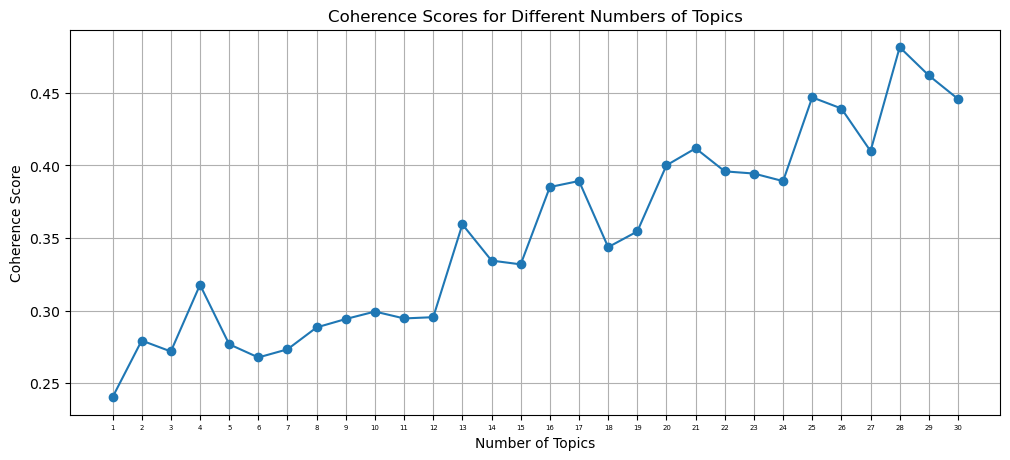

In [15]:
# Plot the coherence scores
plt.figure(figsize=(12, 5))
plt.plot(range(min_topics, max_topics + 1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
# x ticks should only be integers
plt.xticks(range(min_topics, max_topics + 1, 1))
# xticks smaller font
plt.xticks(fontsize=5)
plt.title('Coherence Scores for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model

# Create a CountVectorizer object
# Make sure that max_df corresponds to < documents than min_df
# Set stop_words to 'english' to remove common English stopwords
# Set max_df to 0.95 to remove words that appear in more than 95% of the documents
# Set min_df to 2 to remove words that appear in less than 2 documents
# Create the vectorizer and fit the responses
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
biden_vectorized = vectorizer.fit_transform(biden_responses_cleaned)

# Fit the LDA model
biden_lda = LatentDirichletAllocation(n_components=12, random_state=42)
biden_lda.fit(biden_vectorized)

# Now prepare the pyLDAvis data using the LDA model and vectorizer
pyldavis_data = pyLDAvis.lda_model.prepare(biden_lda, biden_vectorized, vectorizer)

# Store the pyLDAvis data as an HTML file
pyLDAvis.save_html(pyldavis_data, '../output/bidenBIDEN_topics.html')

In [17]:
# Provide titles for each of the topics in both models
# by looking at the top words in each topic 

#TODO: This and then let LLM give topic names

    

# Concreteness and Abstraction of Speakers

In [18]:
# In the file "../data/concreteness_brys.txt" we have a list of words with their concreteness scores
# The file format is like this:
# Word	Bigram	Conc.M	Conc.SD	Unknown	Total	Percent_known	SUBTLEX	Dom_Pos
# roadsweeper	0	4.85	0.37	1	27	0.96	0	0
# traindriver	0	4.54	0.71	3	29	0.90	0	0
# tush	0	4.45	1.01	3	25	0.88	66	0

# Frist, we load the file and create a dictionary with the words as keys and their concreteness scores as values
concreteness_scores = {}
with open('../data/concreteness_brys.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:
        word, _, score, *_ = line.split()
        concreteness_scores[word] = float(score)

print('Number of words with concreteness scores:', len(concreteness_scores))


Number of words with concreteness scores: 37138


In [19]:
# We now want to assess which speaker uses more concrete words in their responses
# which speaker uses more abstract words in their responses
# and we want to visualize the distribution of concreteness scores in the responses of both speakers

# First, we look at a random response and print the concreteness scores of the words in the response
import random
response = random.choice(trump_responses_cleaned)
response_words = response.split()

# Get the concreteness scores of the words in the response, if not found discard the word
response_concreteness_scores = [concreteness_scores.get(word, None) for word in response_words]

# Print the response and the concreteness scores in brackets beside each word
for word, score in zip(response_words, response_concreteness_scores):
    print(f'{word} ({score})', end=' ')
print()



people (4.82) come (1.0) 


In [20]:
# Let's calculate the average concreteness score of the words in the responses of Trump and Kamala
# Considering that some words might not have a concreteness score, we will calculate the average of the scores that are not None 
# The average therefore disregards words that do not have a concreteness score
# For each speaker, we use the _responses_cleaned lists to calculate the average concreteness score

trump_concreteness_scores = [concreteness_scores.get(word, None) for response in trump_responses_cleaned for word in response.split()]
biden_concreteness_scores = [concreteness_scores.get(word, None) for response in biden_responses_cleaned for word in response.split()]

# Calculate the average concreteness scores
trump_avg_concreteness = sum(score for score in trump_concreteness_scores if score is not None) / len([score for score in trump_concreteness_scores if score is not None])
biden_avg_concreteness = sum(score for score in biden_concreteness_scores if score is not None) / len([score for score in biden_concreteness_scores if score is not None])

print('Average concreteness score of words in Trump responses:', trump_avg_concreteness)
print('Average concreteness score of words in Biden responses:', biden_avg_concreteness)




Average concreteness score of words in Trump responses: 2.025367934589406
Average concreteness score of words in Biden responses: 2.1312520868113523


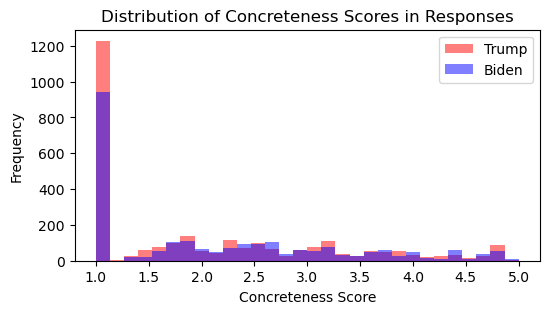

In [21]:
# Now, we want to look at the distribution of concreteness scores in the responses of Trump and Kamala
# We will use histograms to visualize the distribution
# We will remove None values from the concreteness scores before plotting the histograms
# We plot both simultaneously for comparison

# Remove None values from the concreteness scores
trump_conc_scores = [score for score in trump_concreteness_scores if score is not None]
biden_conc_scores = [score for score in biden_concreteness_scores if score is not None]

# Plot the histograms with bins next to each other
plt.figure(figsize=(6, 3))
plt.hist(trump_conc_scores, bins=30, alpha=0.5, label='Trump', color='red')
plt.hist(biden_conc_scores, bins=30, alpha=0.5, label='Biden', color='b')
plt.xlabel('Concreteness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Concreteness Scores in Responses')
plt.legend()
plt.show()


In [22]:
# What are the most concrete and abstract words used by Trump and Kamala in their responses?
trump_concrete_words = [word for response in trump_responses_cleaned for word in response.split() if concreteness_scores.get(word, 0) >= 4.5]
trump_abstract_words = [word for response in trump_responses_cleaned for word in response.split() if concreteness_scores.get(word, 0) <= 2.5]

biden_concrete_words = [word for response in biden_responses_cleaned for word in response.split() if concreteness_scores.get(word, 0) >= 4.5]
biden_abstract_words = [word for response in biden_responses_cleaned for word in response.split() if concreteness_scores.get(word, 0) <= 2.5]

trump_concrete_freq = Counter(trump_concrete_words)
trump_abstract_freq = Counter(trump_abstract_words)

biden_concrete_freq = Counter(biden_concrete_words)
biden_abstract_freq = Counter(biden_abstract_words)

trump_most_concrete = trump_concrete_freq.most_common(5)
trump_most_abstract = trump_abstract_freq.most_common(5)

biden_most_concrete = biden_concrete_freq.most_common(5)
biden_most_abstract = biden_abstract_freq.most_common(5)

print('Most Concrete Words in Trump Responses:')
for word, freq in trump_most_concrete:
    print(f'{word}: {freq}')

print('-----------------')

print('Most Abstract Words in Trump Responses:')
for word, freq in trump_most_abstract:
    print(f'{word}: {freq}')

print('-----------------')

print('Most Concrete Words in Biden Responses:')
for word, freq in biden_most_concrete:
    print(f'{word}: {freq}')

print('-----------------')

print('Most Abstract Words in Biden Responses:')
for word, freq in biden_most_abstract:
    print(f'{word}: {freq}')



Most Concrete Words in Trump Responses:
people: 66
guy: 10
man: 7
veteran: 7
soldier: 6
-----------------
Most Abstract Words in Trump Responses:
go: 58
get: 49
country: 47
take: 47
come: 35
-----------------
Most Concrete Words in Biden Responses:
people: 34
guy: 14
person: 6
veteran: 6
doctor: 5
-----------------
Most Abstract Words in Biden Responses:
go: 59
make: 40
get: 34
idea: 34
want: 28
